In [1]:
# Import Python matplotlib
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [2]:
# Import Python numpy, pandas and datetime
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite", echo=False)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
#Solution 1
#session.query(func.max(Measurement.date)).all()
#Solution 2
recent_data = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_data[0]

'2017-08-23'

In [10]:
# Converting the date from the most recent date in the database
datetime = datetime.strptime(recent_data[0], '%Y-%m-%d')

In [11]:
# Calculate the date one year from the last date in data set.
query_date = dt.date(datetime.year, datetime.month, datetime.day) - dt.timedelta(days=365)
query_date

datetime.date(2016, 8, 23)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Perform a query to retrieve the data and precipitation scores
date_precipitation = session.query(Measurement.date, Measurement.prcp).\
                             filter(Measurement.date >= query_date).\
                             order_by(Measurement.date.desc()).all()
date_precipitation

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [13]:
df = pd.DataFrame(date_precipitation)
df = df.rename(columns={'prcp': 'Precipitation', 'date': 'Date'})
df = df.dropna()
df.head()

,Date,Precipitation
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = df.set_index('Date')
# Sort the dataframe by date
df = df.sort_index(ascending = True)
df

,Precipitation
Date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,0.02
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


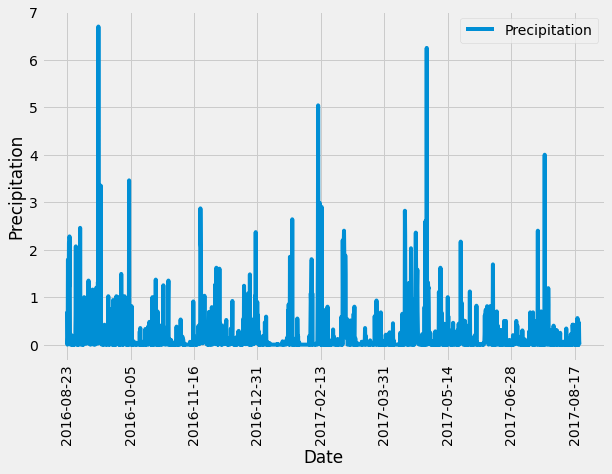

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data and save the plot.
df.plot(figsize=(9,6), grid = True, xlabel = "Date", ylabel = "Precipitation", rot = 90).\
   get_figure().savefig('./Images/precipitation.png', bbox_inches='tight')

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
total_station = session.query(func.count(Station.station)).all()
print ("There are " + str(total_station[0][0]) + " stations in the database.")

There are 9 stations in the database.


In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, Station.id, func.count(Measurement.station)).\
                          filter(Measurement.station==Station.station).\
                          group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# Active station order by the most active to the lowest active
active_stations

[('USC00519281', 7, 2772),
 ('USC00519397', 1, 2724),
 ('USC00513117', 2, 2709),
 ('USC00519523', 6, 2669),
 ('USC00516128', 9, 2612),
 ('USC00514830', 3, 2202),
 ('USC00511918', 8, 1979),
 ('USC00517948', 4, 1372),
 ('USC00518838', 5, 511)]

In [19]:
#Answer the following question: which station id has the greatest number of observations?

active_stations[0]

('USC00519281', 7, 2772)

In [20]:
# Identifying the most active station
most_active_station = active_stations[0][0]
most_active_station

'USC00519281'

In [21]:
# Using the most active station id from the previous query, calculate the lowest temperature.
min_temperature = session.query(Measurement.station,func.min(Measurement.tobs)).\
                          filter(Measurement.station==most_active_station).all()
min_temperature

[('USC00519281', 54.0)]

In [22]:
# Using the most active station id from the previous query, calculate the Highest temperature.
max_temperature = session.query(Measurement.station,func.max(Measurement.tobs)).\
                          filter(Measurement.station==most_active_station).all()
max_temperature

[('USC00519281', 85.0)]

In [23]:
# Using the most active station id from the previous query, calculate the average temperature.
avg_temperature = session.query(Measurement.station,func.avg(Measurement.tobs)).\
                          filter(Measurement.station==most_active_station).all()
avg_temperature

[('USC00519281', 71.66378066378067)]

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Check the latest date for the most active station
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).\
                      filter(Measurement.station == most_active_station).first()
recent_date[0]

'2017-08-18'

In [25]:
#Query the last 12 months of temperature observation data for this station
last_year_data = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
                         filter(Measurement.station == most_active_station, Measurement.date >= dt.date(2017, 8, 18) - dt.timedelta(days=365)).all()
last_year_data

[('USC00519281', '2016-08-18', 80.0),
 ('USC00519281', '2016-08-19', 79.0),
 ('USC00519281', '2016-08-20', 81.0),
 ('USC00519281', '2016-08-21', 79.0),
 ('USC00519281', '2016-08-22', 78.0),
 ('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC005192

In [26]:
# Using the most active station id
# Plot a histogram the results from the query for the last 12 months of temperature observation data for this station and results.

df2 = pd.DataFrame(last_year_data)
df2

,station,date,tobs
0,USC00519281,2016-08-18,80.0
1,USC00519281,2016-08-19,79.0
2,USC00519281,2016-08-20,81.0
3,USC00519281,2016-08-21,79.0
4,USC00519281,2016-08-22,78.0
...,...,...,...
352,USC00519281,2017-08-14,77.0
353,USC00519281,2017-08-15,77.0
354,USC00519281,2017-08-16,76.0
355,USC00519281,2017-08-17,76.0


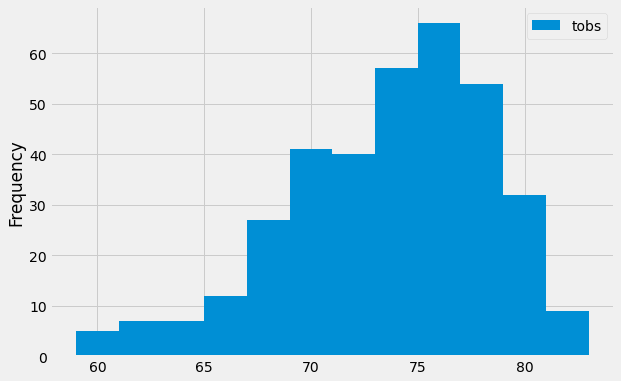

In [27]:
## Using the most active station id
# Plot a histogram the results from the query for the last 12 months of temperature observation data for this station and results.
df2.plot(figsize=(9,6), kind= 'hist', grid = True, xlabel="Temperature", ylabel="Frequency",bins=12).\
   get_figure().savefig('./Images/temperature.png', bbox_inches='tight')

# Close session

In [28]:
# Close Session
session.close()